<a href="https://colab.research.google.com/github/witonisaurus/MAT420/blob/main/Interpolation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a function my_lagrange(x, y, X), where the output Y is the Lagrange interpolation of the data points contained in x and y computed at X. Hint: Use a nested for-loop, where the inner for-loop computes the product for the Lagrange basis polynomial and the outer loop computes the sum for the Lagrange polynomial. Don’t use the existing lagrange function from scipy.

In [46]:
# dependencies
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import random

In [18]:
def my_lagrange(x, y, X):
  Y = []
  n = len(x)
  
  for new_x in X:
    new_y = 0
    for i in range(n):
      part_y = 1
      for j in range(n):
        if j != i:
          part_y *= (new_x - x[j]) / (x[i] - x[j])
      new_y += y[i]*part_y
    Y.append(new_y)
  return Y

In [43]:
def divided_diff(x, y):
  n = len(y)
  coef = np.zeros([n, n])

  coef[:,0] = y

  for j in range(1, n):
    for i in range(n-j):
      coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

  return coef

def my_newton(x, y, X):
  coef = divided_diff(x, y)[0, :]

  n = len(x) - 1
  Y = coef[n]

  for k in range(1, n+1):
    Y = coef[n-k] + (X - x[n-k]) * Y
  return Y


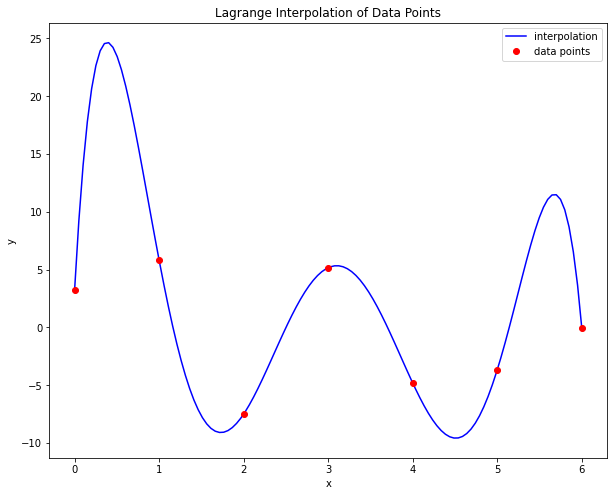

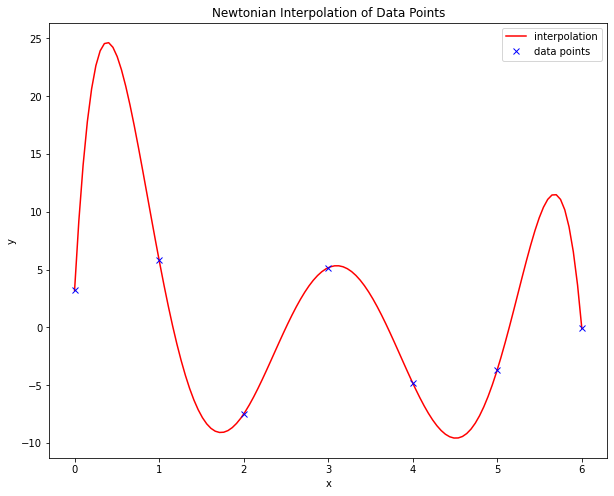

In [59]:
# test cases
# number of test data
n = 6
resolution = 20
x = [i for i in range(n + 1)]
y = [random.uniform(-10, 10) for i in range(n + 1)]

X = np.linspace(0, n, n*resolution)

# Lagrange test

plt.figure(figsize = (10,8 ))
plt.plot(X, my_lagrange(x, y, X), 'b', label = 'interpolation')
plt.plot(x, y, 'ro', label = 'data points')

plt.xlabel('x')
plt.ylabel('y')

plt.title(f'Lagrange Interpolation of Data Points')
plt.legend()
plt.show()

# Newtonian test
plt.figure(figsize = (10,8 ))
plt.plot(X, my_newton(x, y, X), 'r', label = 'interpolation')
plt.plot(x, y, 'bx', label = 'data points')

plt.xlabel('x')
plt.ylabel('y')

plt.title(f'Newtonian Interpolation of Data Points')
plt.legend()
plt.show()